### Distribution of observations
To gain some understanding of the observations values, let's run a number of episodes using a random policy and record the observation values in lists and the plot histograms showing the distribution of the values in those lists. Starting (restarting) the MDP starts each episode. Actions are randomly selected and a step of the MDP is executed. This is done until the episode terminates, which means that the pole falls.

For each episode let's record 
1. The initial observation values, which are the values returned from the reset function
2. All the observation values at all steps of the MDP
3. The observation values corresponding to when the episode terminates

In [3]:
from matplotlib import pyplot as plt
import gymnasium as gym

env = gym.make('CartPole-v1')

The value ``n_episodes`` below set the number of episodes of the CartPole to be run. Each episode runs for some number of steps until it terminates, ``not terminated`` is ``False`` or terminated is True.

In [4]:
n_episodes = 100000
observations = []
initial_observations = []
terminal_observations = []
for _ in range(n_episodes):
    terminated = False
    obs,_ = env.reset()
    initial_observations.append(obs)
    observations.append(obs)
    while not terminated:
        action = env.action_space.sample()
        obs,_,terminated,_,_ = env.step(action)
        if terminated==True:
            terminal_observations.append(obs)
        observations.append(obs)

position = [observations[i][0] for i in range(len(observations))]
velocity = [observations[i][1] for i in range(len(observations))]
angular_position = [observations[i][2] for i in range(len(observations))]
angular_velocity = [observations[i][3] for i in range(len(observations))]

initial_position = [initial_observations[i][0] for i in range(len(initial_observations))]
initial_velocity = [initial_observations[i][1] for i in range(len(initial_observations))]
initial_angular_position = [initial_observations[i][2] for i in range(len(initial_observations))]
initial_angular_velocity = [initial_observations[i][3] for i in range(len(initial_observations))]

terminal_position = [terminal_observations[i][0] for i in range(len(terminal_observations))]
terminal_velocity = [terminal_observations[i][1] for i in range(len(terminal_observations))]
terminal_angular_position = [terminal_observations[i][2] for i in range(len(terminal_observations))]
terminal_angular_velocity = [terminal_observations[i][3] for i in range(len(terminal_observations))]

The code blocks below use Matplotlib to display histrograms of the values in the three lists
1. All observations
2. Terminal observations
3. Initial observations

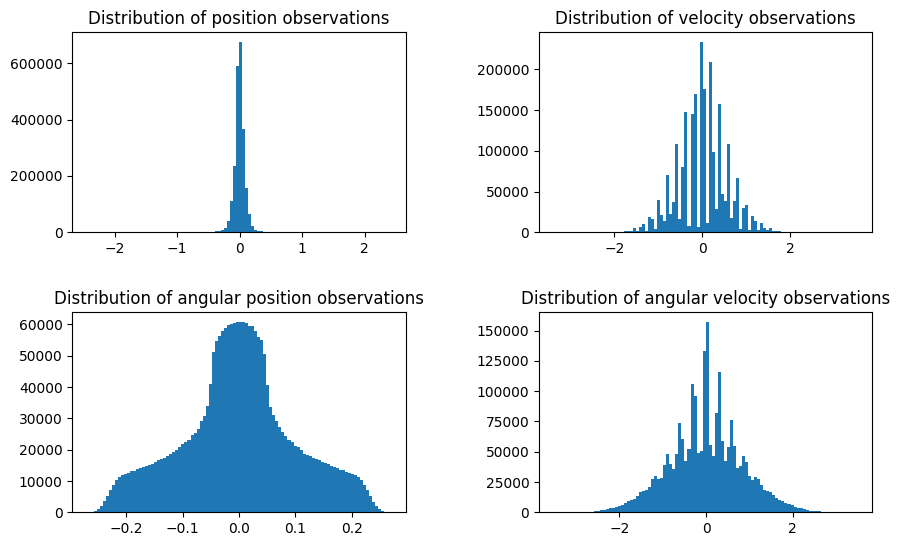

In [5]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(position,bins)
axs[0,0].set_title("Distribution of position observations")
axs[0,1].hist(velocity,bins)
axs[0,1].set_title("Distribution of velocity observations")
axs[1,0].hist(angular_position,bins)
axs[1,0].set_title("Distribution of angular position observations")
axs[1,1].hist(angular_velocity,bins)
axs[1,1].set_title("Distribution of angular velocity observations")
plt.show()

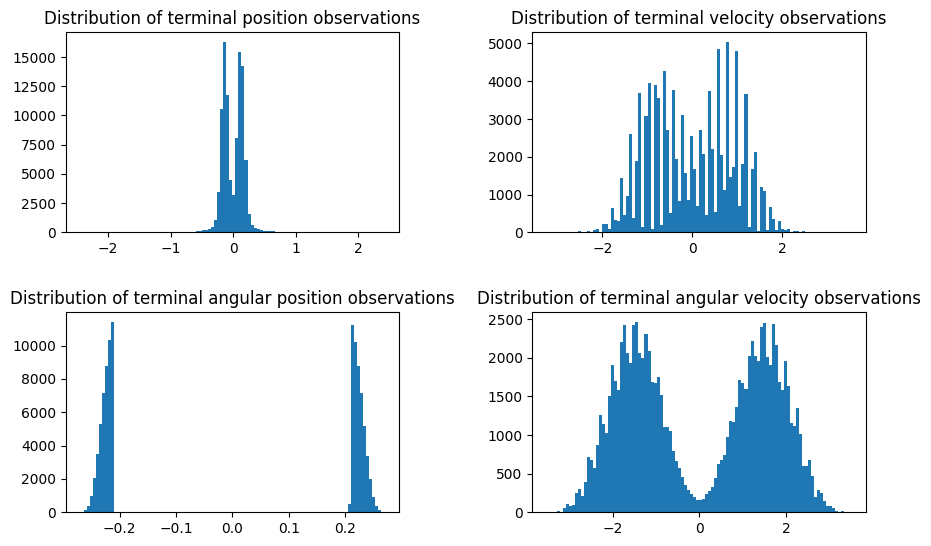

In [6]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(terminal_position,bins)
axs[0,0].set_title("Distribution of terminal position observations")
axs[0,1].hist(terminal_velocity,bins)
axs[0,1].set_title("Distribution of terminal velocity observations")
axs[1,0].hist(terminal_angular_position,bins)
axs[1,0].set_title("Distribution of terminal angular position observations")
axs[1,1].hist(terminal_angular_velocity,bins)
axs[1,1].set_title("Distribution of terminal angular velocity observations")
plt.show()

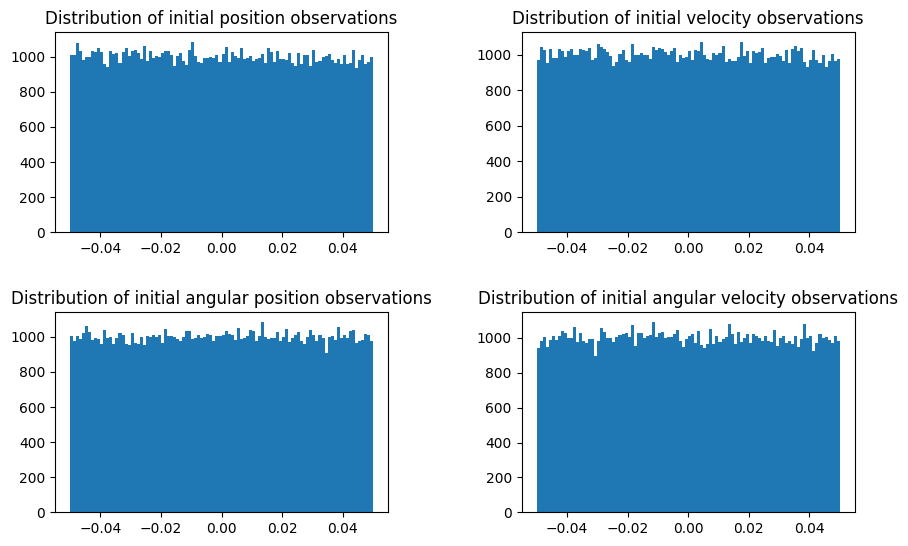

In [7]:
_, axs = plt.subplots(2,2,figsize=(10,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

bins = 100
axs[0,0].hist(initial_position,bins)
axs[0,0].set_title("Distribution of initial position observations")
axs[0,1].hist(initial_velocity,bins)
axs[0,1].set_title("Distribution of initial velocity observations")
axs[1,0].hist(initial_angular_position,bins)
axs[1,0].set_title("Distribution of initial angular position observations")
axs[1,1].hist(initial_angular_velocity,bins)
axs[1,1].set_title("Distribution of initial angular velocity observations")
plt.show()

From the distribution histograms for all observations we might infer that
1. the position observation is generally in the interval [-0.5,0.5]
2. the velocity observation is generally in the interval [-2.0.2.0]
3. the angular position observation is in the interval [-0.28,0.28]
4. the angular velocity observation in in the interval [-2.5,2.5]

The distributions for the terminal observations show that
1. The position of the cart does not significantly change before the pole falls, for the random policy.
2. The when the angular position of the pole has an absolute value greater than 0.2 the pole falls.

The distribution of the initial observations shows that all values are in the interval [-0.05,0.05] when starting the episode.